In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. How do the trends in high-severity events from 2020 to 2023, variations in monthly and daily activity patterns, the distribution of responses to attack types, and the geo-location-specific anomaly scores collectively reveal potential gaps in cybersecurity measures and the evolving nature of threats?

In [48]:
data = pd.read_csv('./data/cybersecurity_attacks_cleaned.csv')

In [3]:
def malware_attack_analysis(df):
    # Categorize anomaly scores
    def categorize_anomaly(score):
        if score < 30:
            return 'Low'
        elif score < 70:
            return 'Medium'
        else:
            return 'High'

    df['Anomaly Category'] = df['Anomaly Scores'].apply(categorize_anomaly)

    # 2. Temporal Trend Analysis
    # Yearly trend for high-severity events
    yearly_severity = df[df['Severity Level'] == 'High'].groupby('Year').size()

    # Monthly trend for high-severity events
    monthly_severity = df[df['Severity Level'] == 'High'].groupby(['Year', 'Month']).size().unstack(fill_value=0)

    # Daily trend for high-severity events
    daily_severity = df[df['Severity Level'] == 'High'].groupby('Day').size()

    # 3. Actions Taken Analysis
    actions_by_signature = df.groupby(['Attack Signature', 'Attack Type', 'Action Taken']).size().unstack(fill_value=0)

    # Actions grouped by geo-location and severity
    actions_by_geo = df.groupby(['Geo-location Data', 'Severity Level', 'Action Taken']).size().unstack(fill_value=0)

    # 4. Geo-location and Attack Correlation
    geo_attack_correlation = df.groupby(['Geo-location Data', 'Attack Type', 'Malware Indicators'])['Anomaly Scores'].mean().reset_index()

    # Anomaly scores by geo-location
    geo_anomaly_distribution = df.groupby('Geo-location Data')['Anomaly Scores'].describe()
    geo_anomaly_distribution['std'] = geo_anomaly_distribution['std'].fillna(0)


    # 5. Interaction Between Dimensions
    interaction_analysis = df.groupby(['Traffic Type', 'Geo-location Data', 'Malware Indicators', 'Attack Type'])['Anomaly Scores'].mean().reset_index()

    # 7. Detailed Analysis Results
    return {
        'Yearly_High_Severity_Events': yearly_severity.to_dict(),
        'Monthly_High_Severity_Events': monthly_severity.to_dict(),
        'Daily_High_Severity_Events': daily_severity.to_dict(),
        'Actions_by_Signature': actions_by_signature.to_dict(),
        'Actions_by_Geo': actions_by_geo.to_dict(),
        'Geo_Attack_Correlation': geo_attack_correlation.to_dict(orient='records'),
        'Interaction_Analysis': interaction_analysis.to_dict(orient='records'),
        'Geo_Anomaly_Distribution': geo_anomaly_distribution.to_dict()
    }

In [49]:
# Print key insights
def print_malware_analysis_insights(results):
    print("\n--- Comprehensive Malware and Attack Analysis Insights ---")

    print("\n1. Yearly High-Severity Events:")
    for year, count in results['Yearly_High_Severity_Events'].items():
        print(f"Year {year}: {count} high-severity events")

    print("\n2. Monthly High-Severity Events:")
    monthly_severity = pd.DataFrame(results['Monthly_High_Severity_Events'])
    print(monthly_severity)

    print("\n3. Daily High-Severity Events:")
    for day, count in results['Daily_High_Severity_Events'].items():
        print(f"Date {day}: {count} high-severity events")

    print("\n4. Top Actions by Attack Type:")
    action_summary = pd.DataFrame(results['Actions_by_Signature']).sum()
    print(action_summary.nlargest(5))

    print("\n5. Geo-location Attack Risk Highlights:")
    geo_correlation = pd.DataFrame(results['Geo_Attack_Correlation'])
    top_risky_locations = geo_correlation.groupby('Geo-location Data')['Anomaly Scores'].mean().nlargest(5)
    print(top_risky_locations)

    print("\n6. Geo-location Anomaly Scores:")
    geo_anomaly = pd.DataFrame(results['Geo_Anomaly_Distribution'])
    print(geo_anomaly.nlargest(5, 'mean'))

In [59]:
def visualize_malware_attack_analysis(analysis_results):
    plt.figure(figsize=(30,20))

    # Yearly Trend for High-Severity Events
    plt.subplot(3, 2, 1)    
    yearly_severity = pd.Series(analysis_results['Yearly_High_Severity_Events'])
    yearly_severity.plot(kind='bar', color='skyblue')
    plt.title('Yearly Trend for High-Severity Events')
    plt.xlabel('Year')
    plt.ylabel('Number of High-Severity Events')
    
    # Monthly Trend for High-Severity Events
    plt.subplot(3, 2, 2)
    monthly_severity = pd.DataFrame(analysis_results['Monthly_High_Severity_Events'])   
    sns.heatmap(monthly_severity, cmap='coolwarm', fmt='g')
    plt.title('Monthly Trend for High-Severity Events')
    plt.xlabel('Month')
    plt.ylabel('Year')

    # Daily Trend for High-Severity Events
    plt.subplot(3, 2, 3)
    daily_severity = pd.Series(analysis_results['Daily_High_Severity_Events'])
    daily_severity.plot(kind='line', color='orange')
    plt.title('Daily Trend for High-Severity Events')
    plt.xlabel('Day')
    plt.ylabel('Number of High-Severity Events')
    
    # Actions by Signature  
    plt.subplot(3, 2, 4)
    actions_by_signature = pd.DataFrame(analysis_results['Actions_by_Signature'])
    actions_plot = actions_by_signature.groupby(level=1).sum()
    sns.heatmap(actions_plot, annot=True, cmap='OrRd', fmt='g')
    plt.title('Actions Taken by Attack Type')

In [60]:
# Execute the analysis
malware_analysis_results = malware_attack_analysis(data)

In [61]:
print_malware_analysis_insights(malware_analysis_results)



--- Comprehensive Malware and Attack Analysis Insights ---

1. Yearly High-Severity Events:
Year 2020: 3514 high-severity events
Year 2021: 3540 high-severity events
Year 2022: 3595 high-severity events
Year 2023: 2733 high-severity events

2. Monthly High-Severity Events:
       1    2    3    4    5    6    7    8    9    10   11   12
2020  279  262  305  279  306  290  284  302  297  301  300  309
2021  301  254  305  301  289  308  323  272  305  301  315  266
2022  304  263  320  292  294  303  316  312  271  287  323  310
2023  270  273  336  302  312  302  269  293  270  106    0    0

3. Daily High-Severity Events:
Date 1: 464 high-severity events
Date 2: 457 high-severity events
Date 3: 396 high-severity events
Date 4: 423 high-severity events
Date 5: 444 high-severity events
Date 6: 453 high-severity events
Date 7: 418 high-severity events
Date 8: 438 high-severity events
Date 9: 474 high-severity events
Date 10: 437 high-severity events
Date 11: 438 high-severity events
Dat

### 1. Yearly High-Severity Events:
- From 2020 to 2022, there was a steady rise in high-severity events (from 3514 to 3595).
- However, 2023 shows a sharp decline to 2733 events.
- The drop in events in 2023 could also result from underreporting, changes in threat patterns, or a lag in data collection.
- The consistent increase from 2020 to 2022 reflects a potential rise in attacker sophistication or frequency of attacks during those years.
### 2. Monthly High-Severity Events:
- Early months (January to March) consistently show higher activity across all years, likely reflecting the start of new campaigns or vulnerability exploitation cycles.
- Later months like October through December, particularly in 2023, show a steep decline, with no events recorded in November and December of 2023.
### 3. Daily High-Severity Events:
- Events fluctuate significantly day-to-day, peaking on Day 25 (465 events) and dropping drastically on Day 31 (248 events).
- Most days have between 400–460 events, reflecting consistent daily activity.
- Peaks could correspond to coordinated attacks, vulnerability disclosure, or active malware campaigns.
- Lower activity on Day 31 might be tied to weekends, holidays, or reduced attacker operations.
### 4. Top Actions by Attack Type:
- Blocked Events:
  - Out of 39,000+ actions recorded, Blocked events (13,529) dominate, highlighting the effectiveness of preventive measures.
- Ignored Events:
  - A high count of Ignored threats (13,276) suggests some events might not have been flagged as critical or actionable, representing a potential security risk.
- Logged Events:
  - Nearly the same number of events (13,195) were logged, emphasizing the importance of documentation for forensic analysis or compliance.
### 5. Geo-location Attack Risk Highlights
- Specific locations show extreme anomaly scores (above 99%), suggesting these areas might have experienced targeted attacks or unusual activity:
  - Jodhpur, Goa tops the list with a perfect anomaly score of 99.94.
  - Other hotspots include Bokaro, Sikkim, and Asansol, Tamil Nadu.
- These regions might be attractive targets due to weak security systems, high-value assets, or infrastructure vulnerabilities.
- High anomaly scores demand further investigation to understand the nature of these threats.

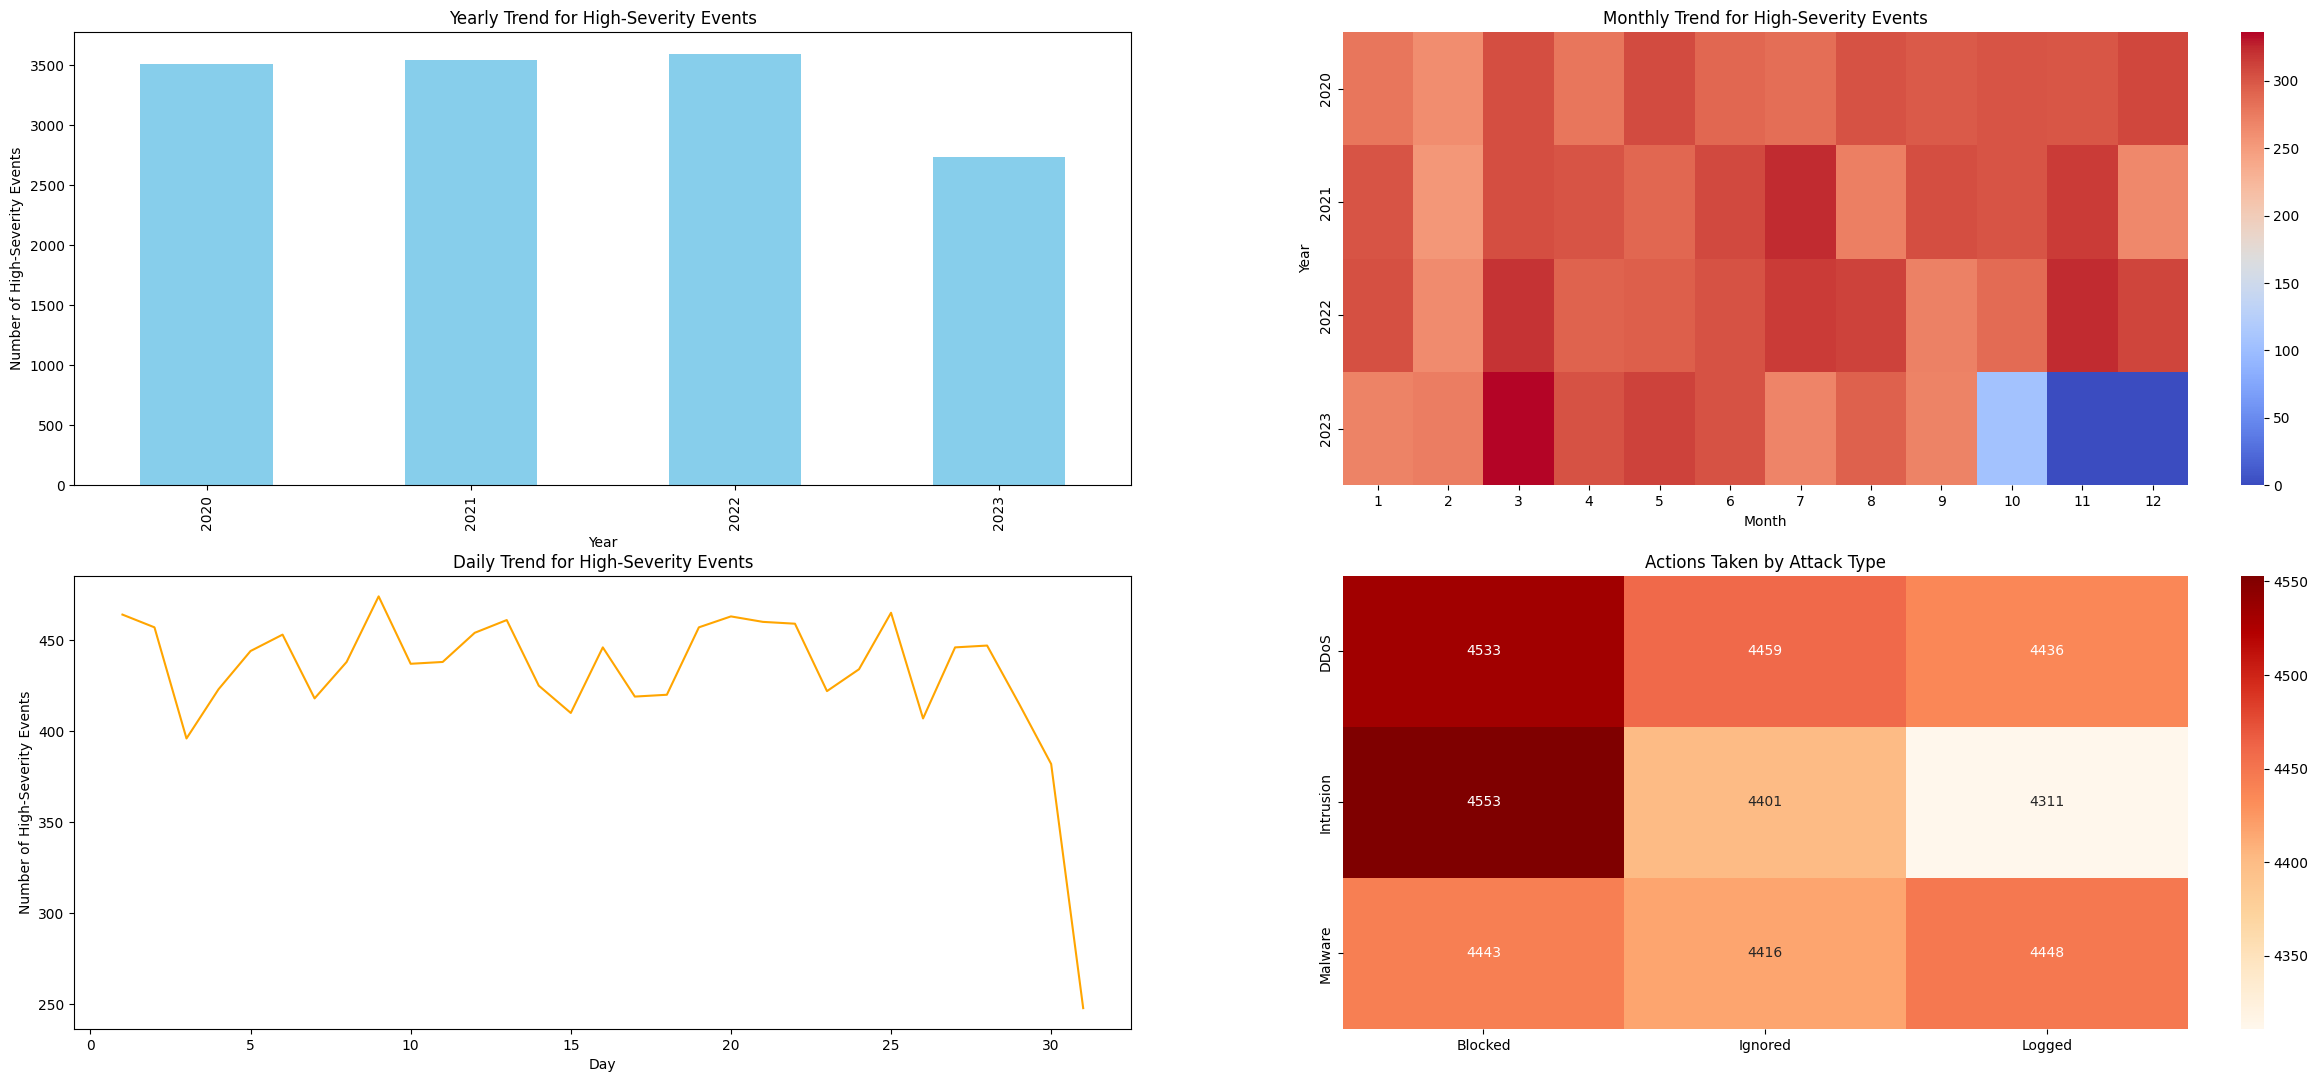

In [62]:
visualize_malware_attack_analysis(malware_analysis_results)

## Conclusion:
The analysis highlights a dynamic and evolving threat landscape, with significant fluctuations in the number and nature of high-severity events across years, months, and even days. The steady rise in incidents from 2020 to 2022 underscores the growing sophistication and frequency of attacks, necessitating robust and adaptive cybersecurity measures.

The monthly and daily trends reveal patterns of increased activity early in the year and specific days with notable spikes, which could be tied to attacker campaigns or vulnerabilities. The steep decline in 2023 raises questions about underreporting or potential shifts in threat actor strategies.

Key actions like blocking and logging events emphasize the importance of preventive and forensic measures, though the high number of ignored threats signals a need for better prioritization to avoid overlooking critical risks. Geo-location anomalies suggest targeted attacks on specific regions, demanding localized investigations and tailored defenses.

Overall, this analysis underscores the importance of continuous monitoring, improved threat intelligence, and proactive defense strategies to address both emerging and persistent threats in the cybersecurity landscape.